# MNIST Handwritten Digit Classifier - Convoluntion Neural Network

Given a dataset of 6,000 images of handwritten digits, train a convoluntion neural network (CNN) to identify the number.

In [2]:
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training, validation and test sets.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1/3)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(49000, 28, 28)
(49000,)
(14000, 28, 28)
(14000,)
(7000, 28, 28)
(7000,)


Show one example digit.

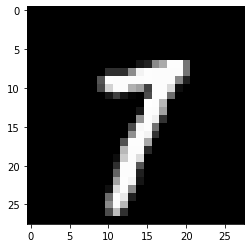

In [6]:
plt.imshow(X_train[1], cmap='gray')

In [7]:
y_train[1]

7

Prepare features and target for training.

In [8]:
image_height, image_width = 28, 28

X_train = X_train.reshape(49000, image_height, image_width, 1)
X_val = X_val.reshape(14000, image_height, image_width, 1)
X_test = X_test.reshape(7000, image_height, image_width, 1)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 28, 28, 1)
(14000, 28, 28, 1)
(7000, 28, 28, 1)


In [9]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(49000, 10)
(14000, 10)
(7000, 10)


Train a convolution neural network.

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(8, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(8, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1608      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 4)                 1

In [14]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1532/1532 [==============================] - 57s 37ms/step - loss: 1.0760 - accuracy: 0.6382 - val_loss: 0.6303 - val_accuracy: 0.8389
Epoch 2/5
1532/1532 [==============================] - 47s 31ms/step - loss: 0.4627 - accuracy: 0.8769 - val_loss: 0.3760 - val_accuracy: 0.8984
Epoch 3/5
1532/1532 [==============================] - 67s 44ms/step - loss: 0.3392 - accuracy: 0.9072 - val_loss: 0.3089 - val_accuracy: 0.9149
Epoch 4/5
1532/1532 [==============================] - 77s 50ms/step - loss: 0.2877 - accuracy: 0.9205 - val_loss: 0.2723 - val_accuracy: 0.9254
Epoch 5/5
1532/1532 [==============================] - 64s 42ms/step - loss: 0.2568 - accuracy: 0.9289 - val_loss: 0.2534 - val_accuracy: 0.9301


Evaluate the model performance.

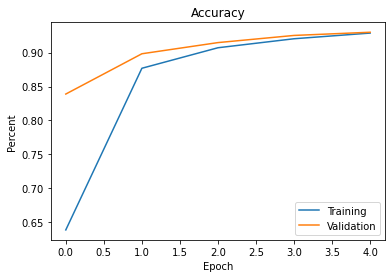

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'])

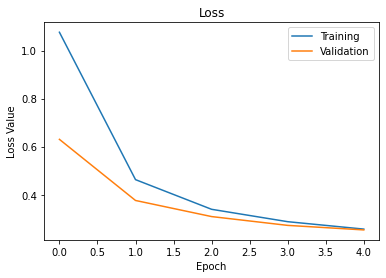

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Validation'])

In [17]:
score = model.evaluate(X_test, y_test)
score

219/219 [==============================] - 6s 26ms/step - loss: 0.2561 - accuracy: 0.9287


[0.2561493217945099, 0.9287142753601074]

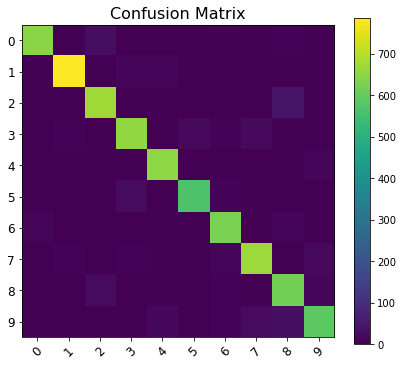

Test accuracy: 0.9287142857142857


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(np.argmax(y_test, axis=1), y_pred_test_classes))
plt.xticks(np.arange(10), np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(np.argmax(y_test, axis=1), y_pred_test_classes))